In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from pathlib import Path

In [16]:
def infection(S, I, R, N, iterations):
    for i in range(iterations):
        S, I, R = S - beta * ((S * I) / N), I + beta * ((S * I) / N) - gamma * I, R + gamma * I 
        S_comp.append(S)
        I_comp.append(I)
        R_comp.append(R)

## Distance Hamming 0

### Perfect mix

### 100000 individus

In [17]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming0/diversite5"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming0/diversite10"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming0/diversite15"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming0/diversite20"

In [18]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0   756  3329723       34     96  3330611
   Init      Run  Mesures  Close    Total
0  1274  3067012       74     98  3068460
   Init      Run  Mesures  Close    Total
0  1128  3045195       40     82  3046447
   Init      Run  Mesures  Close    Total
0  2003  3029834       50     89  3031978


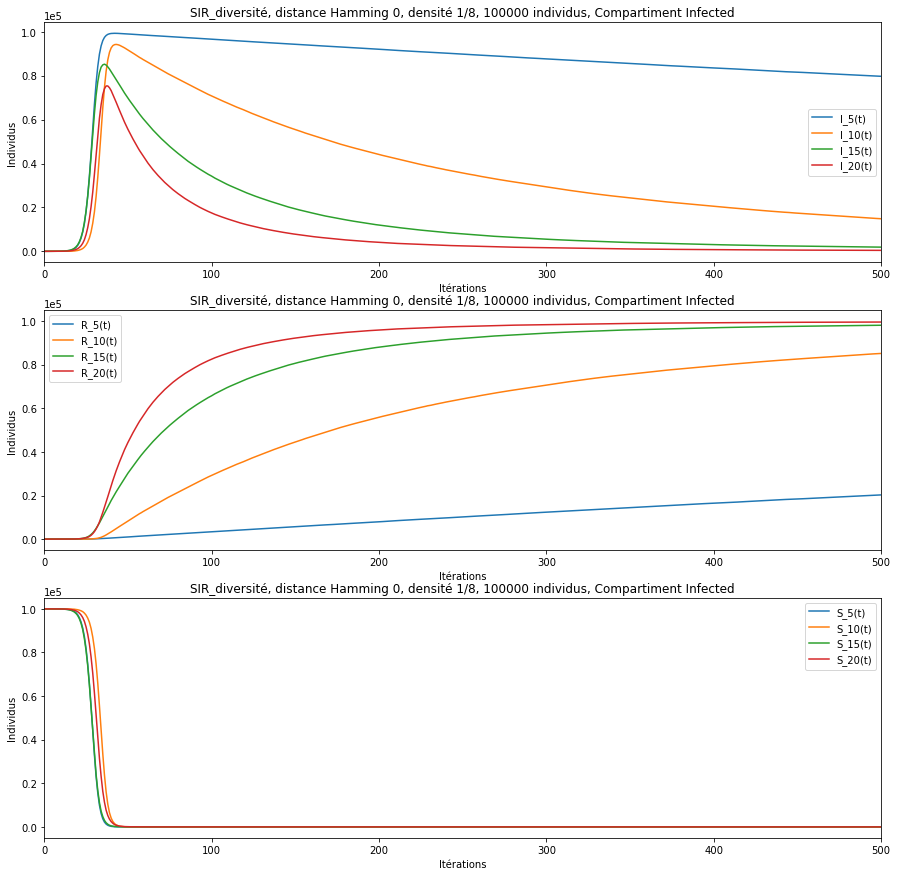

In [19]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 500

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_5, = plt.plot(contamine1, label='I_5(t)')
I_10, = plt.plot(contamine2, label='I_10(t)')
I_15, = plt.plot(contamine3, label='I_15(t)')
I_20, = plt.plot(contamine4, label='I_20(t)')

plt.title("SIR_diversité, distance Hamming 0, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_5, I_10, I_15, I_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_5, = plt.plot(recovered1, label='R_5(t)')
R_10, = plt.plot(recovered2, label='R_10(t)')
R_15, = plt.plot(recovered3, label='R_15(t)')
R_20, = plt.plot(recovered4, label='R_20(t)')

plt.title("SIR_diversité, distance Hamming 0, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_5, R_10, R_15, R_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_5, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5(t)')
S_10, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_10(t)')
S_15, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_15(t)')
S_20, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_20(t)')

plt.title("SIR_diversité, distance Hamming 0, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_5, S_10, S_15, S_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

In [20]:
print("Le pic d'infectés pour une diversité de 5 est de : ", int(contamine1.max()), " à/aux l'itération/s : ", contamine1[contamine1['Nombre de contaminés'] == int(contamine1.max())].index.values)
print("Le pic d'infectés pour une diversité de 10 est de : ", int(contamine2.max()), " à/aux l'itération/s : ", contamine1[contamine2['Nombre de contaminés'] == int(contamine2.max())].index.values)
print("Le pic d'infectés pour une diversité de 15 est de : ", int(contamine3.max()), " à/aux l'itération/s : ", contamine1[contamine3['Nombre de contaminés'] == int(contamine3.max())].index.values)
print("Le pic d'infectés pour une diversité de 20 est de : ", int(contamine4.max()), " à/aux l'itération/s : ", contamine1[contamine4['Nombre de contaminés'] == int(contamine4.max())].index.values)

Le pic d'infectés pour une diversité de 5 est de :  99313  à/aux l'itération/s :  [42 43]
Le pic d'infectés pour une diversité de 10 est de :  94252  à/aux l'itération/s :  [43]
Le pic d'infectés pour une diversité de 15 est de :  85248  à/aux l'itération/s :  [36]
Le pic d'infectés pour une diversité de 20 est de :  75326  à/aux l'itération/s :  [37]


## Distance Hamming 8

### Perfect mix

### 100000 individus

In [21]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming8/diversite5"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming8/diversite10"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming8/diversite15"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming8/diversite20"

In [22]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init      Run  Mesures  Close    Total
0  1173  3052627       42     74  3053918
   Init      Run  Mesures  Close    Total
0  1124  3047370       70     81  3048646
   Init      Run  Mesures  Close    Total
0   873  3036695       42    110  3037722
   Init      Run  Mesures  Close    Total
0  1131  3043568       41     69  3044810


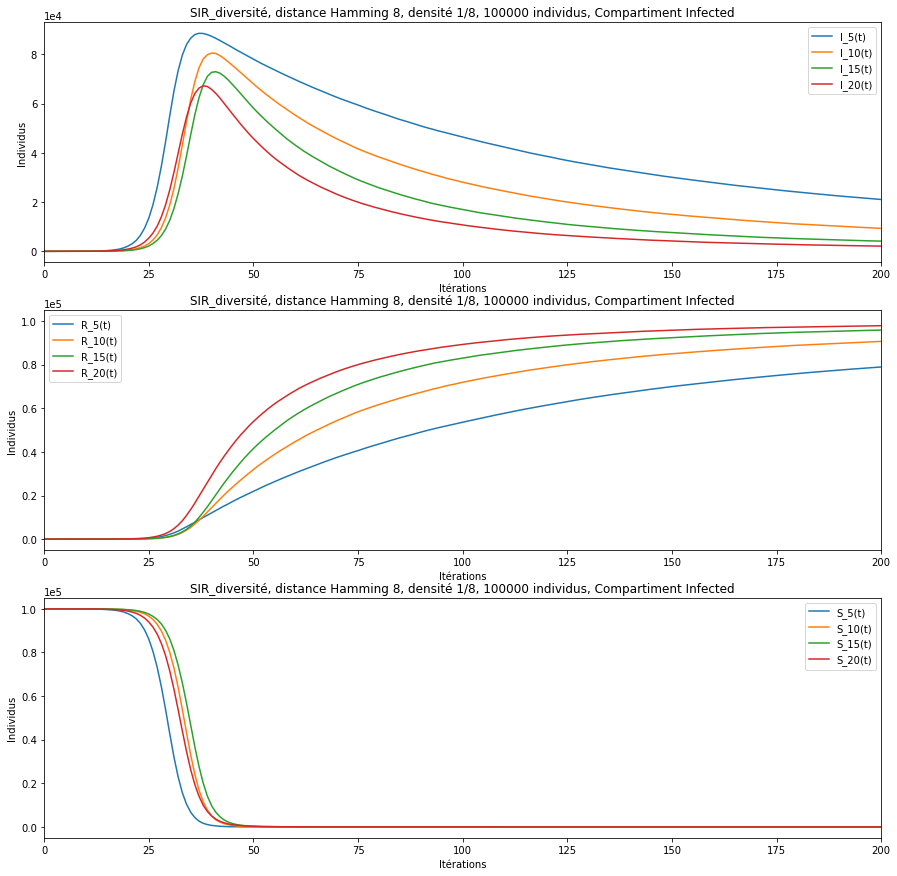

In [23]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 200

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_5, = plt.plot(contamine1, label='I_5(t)')
I_10, = plt.plot(contamine2, label='I_10(t)')
I_15, = plt.plot(contamine3, label='I_15(t)')
I_20, = plt.plot(contamine4, label='I_20(t)')

plt.title("SIR_diversité, distance Hamming 8, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_5, I_10, I_15, I_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_5, = plt.plot(recovered1, label='R_5(t)')
R_10, = plt.plot(recovered2, label='R_10(t)')
R_15, = plt.plot(recovered3, label='R_15(t)')
R_20, = plt.plot(recovered4, label='R_20(t)')

plt.title("SIR_diversité, distance Hamming 8, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_5, R_10, R_15, R_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_5, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5(t)')
S_10, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_10(t)')
S_15, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_15(t)')
S_20, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_20(t)')

plt.title("SIR_diversité, distance Hamming 8, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_5, S_10, S_15, S_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

In [24]:
print("Le pic d'infectés pour une diversité de 5 est de : ", int(contamine1.max()), " à/aux l'itération/s : ", contamine1[contamine1['Nombre de contaminés'] == int(contamine1.max())].index.values)
print("Le pic d'infectés pour une diversité de 10 est de : ", int(contamine2.max()), " à/aux l'itération/s : ", contamine1[contamine2['Nombre de contaminés'] == int(contamine2.max())].index.values)
print("Le pic d'infectés pour une diversité de 15 est de : ", int(contamine3.max()), " à/aux l'itération/s : ", contamine1[contamine3['Nombre de contaminés'] == int(contamine3.max())].index.values)
print("Le pic d'infectés pour une diversité de 20 est de : ", int(contamine4.max()), " à/aux l'itération/s : ", contamine1[contamine4['Nombre de contaminés'] == int(contamine4.max())].index.values)

Le pic d'infectés pour une diversité de 5 est de :  88516  à/aux l'itération/s :  [37]
Le pic d'infectés pour une diversité de 10 est de :  80498  à/aux l'itération/s :  [40]
Le pic d'infectés pour une diversité de 15 est de :  72920  à/aux l'itération/s :  [41]
Le pic d'infectés pour une diversité de 20 est de :  67202  à/aux l'itération/s :  [38]


## Distance hamming 16

### Perfect mix

### 100000 individus

In [25]:
path1 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming16/diversite5"
path2 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming16/diversite10"
path3 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming16/diversite15"
path4 = str(Path("./").parent.absolute().parents[0]) + "/Simulations/SIR/Diversite/perfect_mix/distanceHamming16/diversite20"

In [26]:
temps = pd.read_csv(path1 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path2 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path3 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

temps = pd.read_csv(path4 + "/data_csv/times.csv")
temps_data = pd.DataFrame(temps)
print(temps_data)

   Init     Run  Mesures  Close   Total
0  1262  422921       51    192  424429
   Init      Run  Mesures  Close    Total
0  1273  1177971       46     94  1179385
   Init      Run  Mesures  Close    Total
0  1776  2148532       36    125  2150470
   Init      Run  Mesures  Close    Total
0  1933  1342279       53    145  1344411


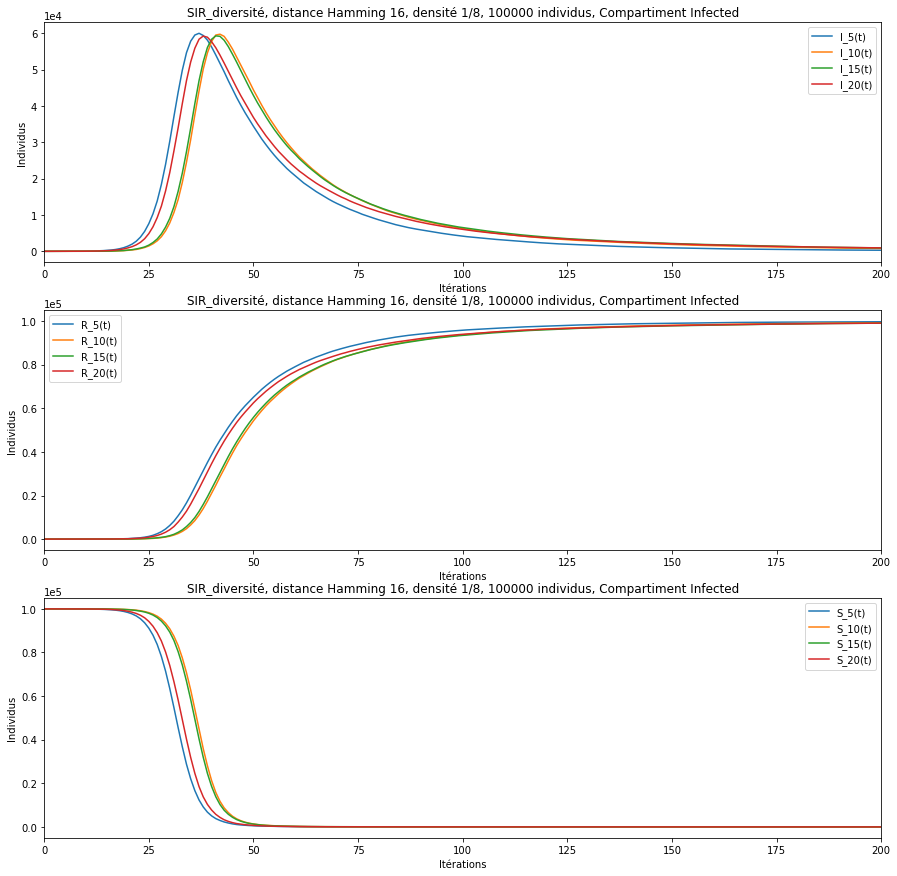

In [27]:
contamine1 = pd.read_csv(path1 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered1 = pd.read_csv(path1 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine2 = pd.read_csv(path2 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered2 = pd.read_csv(path2 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine3 = pd.read_csv(path3 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered3 = pd.read_csv(path3 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)
contamine4 = pd.read_csv(path4 + "/data_csv/m_nombre_contamine.csv", dtype=int)
recovered4 = pd.read_csv(path4 + "/data_csv/m_SIR_recovered_file.csv", dtype=int)

N = 100000 # S + I = N
S = N - 1
I = 1
R = 0
beta = 0.5
gamma = 0.1
iterations = 200

S_comp = [] # infected compartment
I_comp = [] # susceptible compartment
R_comp = [] # recovered compartment

infection(S, I, R, N, iterations)
figure = plt.figure(figsize=(15, 15))

# Infected
plt.subplot(3,1,1)
I_5, = plt.plot(contamine1, label='I_5(t)')
I_10, = plt.plot(contamine2, label='I_10(t)')
I_15, = plt.plot(contamine3, label='I_15(t)')
I_20, = plt.plot(contamine4, label='I_20(t)')

plt.title("SIR_diversité, distance Hamming 16, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[I_5, I_10, I_15, I_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Recovered
plt.subplot(3,1,2)
R_5, = plt.plot(recovered1, label='R_5(t)')
R_10, = plt.plot(recovered2, label='R_10(t)')
R_15, = plt.plot(recovered3, label='R_15(t)')
R_20, = plt.plot(recovered4, label='R_20(t)')

plt.title("SIR_diversité, distance Hamming 16, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[R_5, R_10, R_15, R_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

# Susceptible
plt.subplot(3,1,3)
S_5, = plt.plot((N-contamine1)['Nombre de contaminés'].subtract(recovered1['Recovered']), label='S_5(t)')
S_10, = plt.plot((N-contamine2)['Nombre de contaminés'].subtract(recovered2['Recovered']), label='S_10(t)')
S_15, = plt.plot((N-contamine3)['Nombre de contaminés'].subtract(recovered3['Recovered']), label='S_15(t)')
S_20, = plt.plot((N-contamine4)['Nombre de contaminés'].subtract(recovered4['Recovered']), label='S_20(t)')

plt.title("SIR_diversité, distance Hamming 16, densité 1/8, 100000 individus, Compartiment Infected")
plt.xlabel("Itérations")
plt.ylabel("Individus")
plt.legend(handles=[S_5, S_10, S_15, S_20])

plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0)) # use scientific notation
plt.xlim([0, iterations])

plt.show()

In [28]:
print("Le pic d'infectés pour une diversité de 5 est de : ", int(contamine1.max()), " à/aux l'itération/s : ", contamine1[contamine1['Nombre de contaminés'] == int(contamine1.max())].index.values)
print("Le pic d'infectés pour une diversité de 10 est de : ", int(contamine2.max()), " à/aux l'itération/s : ", contamine1[contamine2['Nombre de contaminés'] == int(contamine2.max())].index.values)
print("Le pic d'infectés pour une diversité de 15 est de : ", int(contamine3.max()), " à/aux l'itération/s : ", contamine1[contamine3['Nombre de contaminés'] == int(contamine3.max())].index.values)
print("Le pic d'infectés pour une diversité de 20 est de : ", int(contamine4.max()), " à/aux l'itération/s : ", contamine1[contamine4['Nombre de contaminés'] == int(contamine4.max())].index.values)

Le pic d'infectés pour une diversité de 5 est de :  59966  à/aux l'itération/s :  [37]
Le pic d'infectés pour une diversité de 10 est de :  59716  à/aux l'itération/s :  [42]
Le pic d'infectés pour une diversité de 15 est de :  59258  à/aux l'itération/s :  [41]
Le pic d'infectés pour une diversité de 20 est de :  59209  à/aux l'itération/s :  [38]
<ipython-input-28-f58882738d99>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Le pic d'infectés pour une diversité de 10 est de : ", int(contamine2.max()), " à/aux l'itération/s : ", contamine1[contamine2['Nombre de contaminés'] == int(contamine2.max())].index.values)
<ipython-input-28-f58882738d99>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Le pic d'infectés pour une diversité de 15 est de : ", int(contamine3.max()), " à/aux l'itération/s : ", contamine1[contamine3['Nombre de contaminés'] == int(contamine3.max())].index.values)
<ipython-input-28-f58882738